<a href="https://colab.research.google.com/github/urenajose/DS-Unit-2-Applied-Modeling/blob/master/DS_Unit_231_ACC_Shelter_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set selected for unit 2


##dependencies

In [ ]:
%%capture
import sys

In [ ]:
!pip install pandas-profiling==2.*
!pip install category_encoders==2.*

     |████████████████████████████████| 266kB 2.5MB/s 
     |████████████████████████████████| 71kB 4.3MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 3.1MB 6.3MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 604kB 31.1MB/s 
     |████████████████████████████████| 296kB 27.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=983bc24571ac9e3a129ab547ad19206adf06da9a7973ad551a06bf0dd5117a1b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=c531fcc08990a14998c8b7f7dbba8eef4cb326bb268e39ded95ac3d97f810850
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 72kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=fc994e173d46a7895ab61de76356061bab3dbed8417a7e40f132a14145bcd86b
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [162]:
pip install shap

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] =72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

## Shelter

In [ ]:
df_shelter = pd.read_csv('https://raw.githubusercontent.com/urenajose/DS-Unit-2-Applied-Modeling/master/aac_shelter_outcomes.csv')

In [ ]:
display(df_shelter.sample(10))

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
69851,1 year,A740780,Cat,Domestic Shorthair Mix,Black/White,2016-02-22T00:00:00,2017-04-10T13:17:00,2017-04-10T13:17:00,Figaro,Partner,Transfer,Neutered Male
70984,2 years,A741404,Dog,Pit Bull Mix,Blue/White,2015-01-01T00:00:00,2017-01-03T18:10:00,2017-01-03T18:10:00,Squishy,NaN,Return to Owner,Neutered Male
39352,4 weeks,A705506,Cat,Domestic Shorthair Mix,Black,2015-05-18T00:00:00,2015-06-18T17:28:00,2015-06-18T17:28:00,NaN,Partner,Transfer,Intact Male
20265,3 months,A682538,Dog,Dachshund Wirehair Mix,Tricolor/Chocolate,2014-03-29T00:00:00,2014-06-29T15:09:00,2014-06-29T15:09:00,Brandy,Partner,Transfer,Intact Female
69486,12 years,A726448,Dog,Pit Bull Mix,Brown,2004-05-11T00:00:00,2016-05-26T15:47:00,2016-05-26T15:47:00,*Ellie,Partner,Transfer,Intact Female
68296,6 months,A711281,Cat,Domestic Shorthair Mix,Brown Tabby/White,2015-03-04T00:00:00,2015-09-05T11:07:00,2015-09-05T11:07:00,Muffins,NaN,Return to Owner,Neutered Male
42466,1 month,A736349,Cat,Domestic Shorthair Mix,Black,2016-09-02T00:00:00,2016-10-13T15:58:00,2016-10-13T15:58:00,*Mica,Partner,Transfer,Intact Female
22154,7 years,A656510,Cat,Domestic Medium Hair Mix,Black,2006-06-15T00:00:00,2014-01-15T08:32:00,2014-01-15T08:32:00,Sonny,Foster,Adoption,Neutered Male
12113,1 year,A691703,Dog,French Bulldog,White/Black,2013-11-08T00:00:00,2014-11-09T11:53:00,2014-11-09T11:53:00,Dexter,NaN,Return to Owner,Intact Male
78197,2 years,A765875,Cat,Domestic Shorthair Mix,Brown Tabby/White,2016-01-29T00:00:00,2018-01-31T18:07:00,2018-01-31T18:07:00,NaN,Snr,Transfer,Intact Male


In [ ]:
df_shelter.outcome_type.value_counts()

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

In [ ]:
df_shelter.breed.value_counts()

Domestic Shorthair Mix                23335
Pit Bull Mix                           6135
Chihuahua Shorthair Mix                4733
Labrador Retriever Mix                 4608
Domestic Medium Hair Mix               2323
                                      ...  
Golden Retriever/Brittany                 1
Beagle/Cavalier Span                      1
Australian Shepherd/Brittany              1
Cavalier Span/Jack Russell Terrier        1
Pug/Boxer                                 1
Name: breed, Length: 2128, dtype: int64

In [ ]:
df_shelter.outcome_type.value_counts(dropna=True).index

Index(['Adoption', 'Transfer', 'Return to Owner', 'Euthanasia', 'Died',
       'Disposal', 'Rto-Adopt', 'Missing', 'Relocate'],
      dtype='object')

In [245]:
dict_outcome = {'Adoption':1, 'Transfer':1, 'Return to Owner':1, 'Euthanasia':0, 'Died':0,'Disposal':0, 'Rto-Adopt':1, 'Missing':1, 'Relocate':1}

In [246]:
# dict_outcome = {'Adoption':'Lived', 'Transfer':'Lived', 'Return to Owner':'Lived', 'Euthanasia':'Died', 'Died':'Died','Disposal':'Died', 'Rto-Adopt':'Lived', 'Missing':'Lived', 'Relocate':'Lived'}

In [247]:
df_shelter['Target'] = df_shelter.outcome_type.replace(dict_outcome)

In [248]:
df_shelter.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,Target,Name_known,age_upon_outcome_d,sex,age_days_at_intake,year_birth,month_birth,year_intake,month_intake,selected_breed
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,intact male,1,0,14.0,male,15,2014,7,2014,7,Cat
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,spayed female,1,1,365.0,female,366,2012,11,2013,11,Rare Dog Mix
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,neutered male,1,1,365.0,male,429,2013,3,2014,6,Rare Dog Mix
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,neutered male,1,1,3285.0,male,3300,2005,6,2014,6,Rare Dog Mix
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,unknown,0,0,150.0,unknown,181,2014,1,2014,7,Non_dog_cat


In [249]:
df_shelter['Target'].value_counts()

1    71177
0     7067
Name: Target, dtype: int64

In [250]:
71177/(71177+7067)

0.9096799754613772

In [251]:
df_shelter = df_shelter[df_shelter['Target'].notna()] #filter null values from my target

In [252]:
df_shelter.Target.isnull().sum()

0

In [253]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_shelter, minimal=True).to_notebook_iframe()

profile

##Applied-Modeling test


In [254]:
train = df_shelter.drop(['outcome_subtype','outcome_type','date_of_birth','datetime','monthyear'],axis=1)

In [255]:
train, test = train_test_split(train, train_size=0.80,test_size=.20, random_state=42)

In [256]:
X_train_t = train.drop('Target',axis=1)
y_train_t = train['Target']
X_test_t = test.drop('Target',axis=1)
y_test_t = test['Target']

In [257]:
%%time
transformers = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(strategy='most_frequent')
                         )

CPU times: user 424 µs, sys: 16 µs, total: 440 µs
Wall time: 451 µs


In [258]:
%%time
X_train_transformed_t = transformers.fit_transform(X_train_t)
X_test_transformed_t = transformers.transform(X_test_t)




CPU times: user 540 ms, sys: 7.01 ms, total: 547 ms
Wall time: 564 ms


In [259]:
%%time
model = RandomForestClassifier(random_state=0, n_jobs=6,max_depth=30,n_estimators=400,min_samples_leaf=2,max_features='auto',bootstrap=False,min_samples_split=4)
model.fit(X_train_transformed_t, y_train_t)

CPU times: user 1min 35s, sys: 278 ms, total: 1min 35s
Wall time: 48.7 s


##Permutation IMportance

In [260]:
import eli5
from eli5.sklearn import PermutationImportance

In [261]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state = 42)

In [262]:
permuter.fit(X_test_transformed_t, y_test_t)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=30,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       min_weight_fra

In [263]:
eli5.show_weights(permuter,
                  top=None,feature_names=X_train_t.columns.values)

Weight,Feature
0.0376 ± 0.0007,animal_type
0.0220 ± 0.0011,Name_known
0.0048 ± 0.0017,breed
0.0041 ± 0.0013,name
0.0034 ± 0.0011,sex_upon_outcome
0.0030 ± 0.0004,age_days_at_intake
0.0010 ± 0.0008,year_intake
0.0009 ± 0.0006,selected_breed
0.0007 ± 0.0005,age_upon_outcome
0.0006 ± 0.0012,age_upon_outcome_d


In [264]:
cross_val_score(model, X_train_transformed_t, y_train_t, cv=3)

array([0.9537503 , 0.95581117, 0.95331896])

In [265]:
np.array([0.80062305, 0.82175893, 0.81504913]).mean()

0.8124770366666668

##Feature Creation

In [266]:
df_shelter.isnull().sum()

age_upon_outcome          0
animal_id                 0
animal_type               0
breed                     0
color                     0
date_of_birth             0
datetime                  0
monthyear                 0
name                  23881
outcome_subtype       42281
outcome_type              0
sex_upon_outcome          0
Target                    0
Name_known                0
age_upon_outcome_d      427
sex                       0
age_days_at_intake        0
year_birth                0
month_birth               0
year_intake               0
month_intake              0
selected_breed            0
dtype: int64

In [267]:
df_shelter['Name_known'] = np.where(df_shelter.name.isnull(), 0, 1)

In [268]:
df_shelter['age_upon_outcome'].value_counts(dropna=False)

1 year       14352
2 years      11194
2 months      9213
3 years       5157
3 months      3442
1 month       3341
4 years       2990
5 years       2691
4 months      2425
5 months      1951
6 months      1897
6 years       1810
8 years       1554
7 years       1537
3 weeks       1467
2 weeks       1330
10 months     1203
4 weeks       1193
8 months      1178
10 years      1158
7 months       963
9 years        822
9 months       673
12 years       609
1 weeks        513
11 months      490
11 years       429
1 week         427
13 years       389
14 years       253
3 days         235
2 days         217
15 years       208
1 day          153
6 days         152
4 days         136
5 days         116
16 years       101
0 years         94
5 weeks         61
17 years        58
18 years        26
19 years        13
20 years        12
x x              6
22 years         4
25 years         1
Name: age_upon_outcome, dtype: int64

In [269]:
df_shelter['age_upon_outcome'].fillna("x x",inplace=True)

In [270]:
df_shelter['age_upon_outcome'][0].split()[0]

'2'

In [271]:
df_shelter['age_upon_outcome'][78252].split()[1]

'years'

In [272]:
z = df_shelter['age_upon_outcome'][0]

In [273]:
z.split()[1] == 'weeks'

True

In [274]:
def gregorian_unit(g):
    '''returns number of days base on gregorian unit'''
    try:
      if g.split()[1] == 'day':
        x = int(g.split()[0])*1
        return x
      elif g.split()[1] == 'days':
        x = int(g.split()[0])*1
        return x
      elif g.split()[1] == 'week':
        x = int(g.split()[0])*7
      elif g.split()[1] == 'weeks':
        x = int(g.split()[0])*7
        return x
      elif g.split()[1] == 'month':
        x = int(g.split()[0])*30
        return x
      elif g.split()[1] == 'months':
        x = int(g.split()[0])*30
        return x
      elif g.split()[1] == 'year':
        x = int(g.split()[0])*365
        return x
      elif g.split()[1] == 'years':
        x = int(g.split()[0])*365
        return x
      else:
        return 0
    except: 
        return 0 
# I did this to convert this string to numbers age_upon_outcome 

In [275]:
df_shelter['age_upon_outcome'][15]

'2 years'

In [276]:
print(gregorian_unit(df_shelter['age_upon_outcome'][15]))

730


In [277]:
df_shelter['age_upon_outcome'].str.find('years') 

0       -1
1       -1
2       -1
3        2
4       -1
        ..
78251   -1
78252    2
78253   -1
78254   -1
78255   -1
Name: age_upon_outcome, Length: 78244, dtype: int64

In [278]:
df_shelter['age_upon_outcome_d'] = [gregorian_unit(d) for d in df_shelter['age_upon_outcome']]

In [279]:
df_shelter.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,Target,Name_known,age_upon_outcome_d,sex,age_days_at_intake,year_birth,month_birth,year_intake,month_intake,selected_breed
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,intact male,1,0,14.0,male,15,2014,7,2014,7,Cat
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,spayed female,1,1,365.0,female,366,2012,11,2013,11,Rare Dog Mix
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,neutered male,1,1,365.0,male,429,2013,3,2014,6,Rare Dog Mix
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,neutered male,1,1,3285.0,male,3300,2005,6,2014,6,Rare Dog Mix
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,unknown,0,0,150.0,unknown,181,2014,1,2014,7,Non_dog_cat


In [280]:
df_shelter['sex_upon_outcome'].fillna('Unknown',inplace=True)
df_shelter['sex_upon_outcome'].value_counts(dropna=False)

neutered male    27783
spayed female    25203
intact male       9547
intact female     9140
unknown           6571
Name: sex_upon_outcome, dtype: int64

In [281]:
df_shelter['sex_upon_outcome'] = df_shelter['sex_upon_outcome'].str.lower() #make all observation string lower case, makes all text lower case

In [282]:
df_shelter['sex_upon_outcome'].str

In [283]:
import re

In [284]:
male = [bool(re.search(r'\bmale\b', i ,flags=re.IGNORECASE)) for i in df_shelter['sex_upon_outcome']] #serch for exact word return true or false if found
pd.DataFrame({"sex":male}).head()

,sex
0,True
1,False
2,True
3,True
4,False


In [285]:
female = [bool(re.search(r'\bfemale\b', i ,flags=re.IGNORECASE)) for i in df_shelter['sex_upon_outcome']]  #serch for exact word return true or false if found
pd.DataFrame({"sex":female}).head()

,sex
0,False
1,True
2,False
3,False
4,False


In [286]:
df_shelter['sex'] = df_shelter['sex_upon_outcome'].copy()

In [287]:
df_shelter.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,Target,Name_known,age_upon_outcome_d,sex,age_days_at_intake,year_birth,month_birth,year_intake,month_intake,selected_breed
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,intact male,1,0,14.0,intact male,15,2014,7,2014,7,Cat
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,spayed female,1,1,365.0,spayed female,366,2012,11,2013,11,Rare Dog Mix
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,neutered male,1,1,365.0,neutered male,429,2013,3,2014,6,Rare Dog Mix
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,neutered male,1,1,3285.0,neutered male,3300,2005,6,2014,6,Rare Dog Mix
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,unknown,0,0,150.0,unknown,181,2014,1,2014,7,Non_dog_cat


In [288]:
df_shelter.loc[male, 'sex'] = 'male'

In [289]:
df_shelter.loc[female, 'sex'] = 'female'

In [290]:
# df_shelter.age_upon_outcome_d.value_counts()

In [291]:
df_shelter["age_days_at_intake"] = (pd.to_datetime(df_shelter['datetime'])-pd.to_datetime(df_shelter['date_of_birth'])).dt.days

In [292]:
df_shelter['year_birth'] = pd.to_datetime(df_shelter['date_of_birth']).dt.year
# df_shelter.year_birth.value_counts()

In [293]:
df_shelter['month_birth'] = pd.to_datetime(df_shelter['date_of_birth']).dt.month
# df_shelter.month_birth.value_counts()

In [294]:
df_shelter['year_intake'] = pd.to_datetime(df_shelter['datetime']).dt.year

In [295]:
df_shelter['month_intake'] = pd.to_datetime(df_shelter['datetime']).dt.month

In [296]:
pd.DataFrame({'breed':df_shelter.breed.value_counts()})[pd.DataFrame({'breed':df_shelter.breed.value_counts()})['breed'] < 1000] #value_counts filtering

,breed
Siamese Mix,998
Bat,799
Dachshund Mix,798
Boxer Mix,674
Miniature Poodle Mix,648
...,...
Golden Retriever/Brittany,1
Beagle/Cavalier Span,1
Australian Shepherd/Brittany,1
Cavalier Span/Jack Russell Terrier,1


In [297]:
my_dog = df_shelter.animal_type == 'Dog'
my_dog

0        False
1         True
2         True
3         True
4        False
         ...  
78251     True
78252     True
78253    False
78254     True
78255     True
Name: animal_type, Length: 78244, dtype: bool

In [298]:
df_shelter['selected_breed'] = df_shelter.breed

In [299]:
df_shelter.loc[~my_dog, 'selected_breed'] = 'Non_dog_cat'

In [300]:
my_cat = df_shelter.animal_type == 'Cat'
my_cat

0         True
1        False
2        False
3        False
4        False
         ...  
78251    False
78252    False
78253    False
78254    False
78255    False
Name: animal_type, Length: 78244, dtype: bool

In [301]:
rare_dog = df_shelter.selected_breed.value_counts()[df_shelter.selected_breed.value_counts() < 476].index.values

In [302]:
selected_breed = df_shelter.breed.isin(rare_dog)

In [303]:
df_shelter.loc[selected_breed, 'selected_breed'] = "Rare Dog Mix"

In [304]:
df_shelter.loc[my_cat, 'selected_breed'] = 'Cat'

In [305]:
df_shelter.selected_breed.value_counts()

Cat                          29419
Rare Dog Mix                 22572
Pit Bull Mix                  6133
Chihuahua Shorthair Mix       4733
Labrador Retriever Mix        4607
Non_dog_cat                   4587
German Shepherd Mix           1892
Australian Cattle Dog Mix     1059
Dachshund Mix                  798
Boxer Mix                      674
Miniature Poodle Mix           648
Border Collie Mix              646
Catahoula Mix                  476
Name: selected_breed, dtype: int64

In [306]:
df_shelter.iloc[:,-1:]

,selected_breed
0,Cat
1,Rare Dog Mix
2,Rare Dog Mix
3,Rare Dog Mix
4,Non_dog_cat
...,...
78251,Rare Dog Mix
78252,Rare Dog Mix
78253,Non_dog_cat
78254,Rare Dog Mix


In [307]:
df_shelter.selected_breed.value_counts()

Cat                          29419
Rare Dog Mix                 22572
Pit Bull Mix                  6133
Chihuahua Shorthair Mix       4733
Labrador Retriever Mix        4607
Non_dog_cat                   4587
German Shepherd Mix           1892
Australian Cattle Dog Mix     1059
Dachshund Mix                  798
Boxer Mix                      674
Miniature Poodle Mix           648
Border Collie Mix              646
Catahoula Mix                  476
Name: selected_breed, dtype: int64

In [308]:
df_shelter.columns.values

array(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'Target',
       'Name_known', 'age_upon_outcome_d', 'sex', 'age_days_at_intake',
       'year_birth', 'month_birth', 'year_intake', 'month_intake',
       'selected_breed'], dtype=object)

In [309]:
df = df_shelter.drop(['outcome_subtype','outcome_type','age_upon_outcome','name','animal_id', 'breed','date_of_birth', 'datetime', 'monthyear','year_intake','month_intake','month_birth','year_birth'],axis=1).copy()

In [310]:
df

,animal_type,color,sex_upon_outcome,Target,Name_known,age_upon_outcome_d,sex,age_days_at_intake,selected_breed
0,Cat,Orange Tabby,intact male,1,0,14.0,male,15,Cat
1,Dog,White/Brown,spayed female,1,1,365.0,female,366,Rare Dog Mix
2,Dog,Blue/White,neutered male,1,1,365.0,male,429,Rare Dog Mix
3,Dog,White,neutered male,1,1,3285.0,male,3300,Rare Dog Mix
4,Other,Brown,unknown,0,0,150.0,unknown,181,Non_dog_cat
...,...,...,...,...,...,...,...,...,...
78251,Dog,Brown/White,spayed female,1,0,30.0,female,59,Rare Dog Mix
78252,Dog,Blue/White,neutered male,1,1,1095.0,male,1129,Rare Dog Mix
78253,Other,Brown,unknown,0,0,0.0,unknown,365,Non_dog_cat
78254,Dog,Red,spayed female,1,0,60.0,female,80,Rare Dog Mix


In [311]:
train, test = train_test_split(df, train_size=0.80,test_size=.20, random_state=42)

In [312]:
X_train_t = train.drop('Target',axis=1)
y_train_t = train['Target']
X_test_t = test.drop('Target',axis=1)
y_test_t = test['Target']

##Model

In [313]:
%%time
transformers = make_pipeline(ce.OrdinalEncoder())

CPU times: user 2.24 ms, sys: 6 µs, total: 2.24 ms
Wall time: 2.25 ms


In [314]:
%%time
X_train_transformed_t = transformers.fit_transform(X_train_t)
X_test_transformed_t = transformers.transform(X_test_t)




CPU times: user 147 ms, sys: 4.03 ms, total: 151 ms
Wall time: 155 ms


In [315]:
%%time
model = XGBClassifier(random_state=42, n_jobs=6,n_estimators=100)
model.fit(X_train_transformed_t, y_train_t)

CPU times: user 4.63 s, sys: 69.5 ms, total: 4.7 s
Wall time: 2.63 s


In [316]:
cross_val_score(model, X_train_transformed_t, y_train_t, cv=3).mean()

0.9511941848390447

In [317]:
feature = 'sex_upon_outcome'

In [318]:
isolated = pdp_isolate(model=model,
                       dataset=X_train_transformed_t,
                       model_features = X_train_t.columns,
                       feature=feature)

In [319]:
pd.DataFrame({'Encoder_sex':ce.OrdinalEncoder().fit_transform(X_train_t).sex_upon_outcome,'sex_label':df_shelter['sex_upon_outcome']}).groupby('sex_label').max()

,Encoder_sex
sex_label,
intact female,4.0
intact male,5.0
neutered male,3.0
spayed female,1.0
unknown,2.0


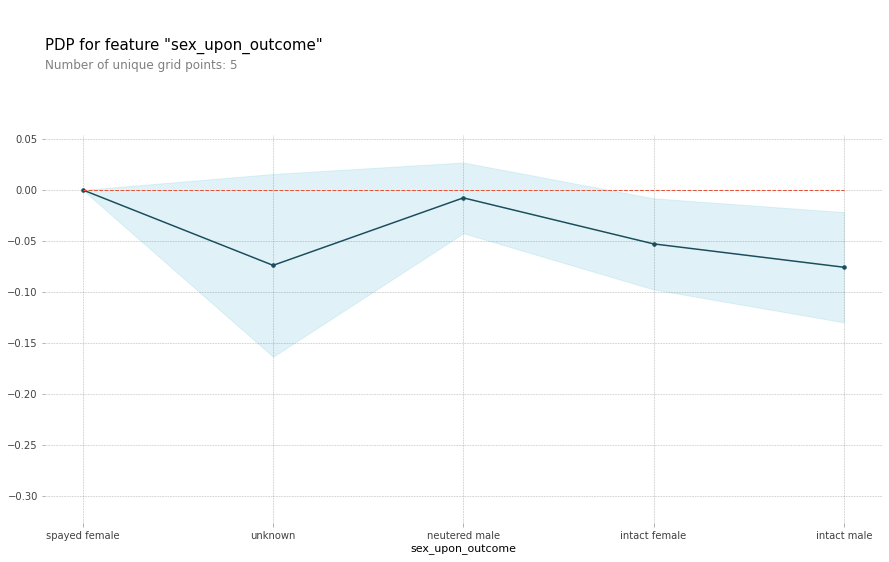

In [320]:
pdp_plot(isolated,feature_name=feature)
plt.xticks([4,5,3,1,2],['intact female','intact male','neutered male','spayed female','unknown'])
plt.show()

In [321]:
X_train_transformed_t.columns

Index(['animal_type', 'color', 'sex_upon_outcome', 'Name_known',
       'age_upon_outcome_d', 'sex', 'age_days_at_intake', 'selected_breed'],
      dtype='object')

In [322]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [323]:
df['selected_breed']

0                           Cat
1                  Rare Dog Mix
2                  Rare Dog Mix
3                  Rare Dog Mix
4                   Non_dog_cat
                  ...          
78251              Rare Dog Mix
78252              Rare Dog Mix
78253               Non_dog_cat
78254              Rare Dog Mix
78255    Labrador Retriever Mix
Name: selected_breed, Length: 78244, dtype: object

In [324]:
pd.DataFrame({'selected_breed_en':ce.OrdinalEncoder().fit_transform(X_train_t).selected_breed,'selected_breed_label':X_train_t.selected_breed}).groupby("selected_breed_label").max()

,selected_breed_en
selected_breed_label,
Australian Cattle Dog Mix,10
Border Collie Mix,11
Boxer Mix,13
Cat,1
Catahoula Mix,12
Chihuahua Shorthair Mix,5
Dachshund Mix,8
German Shepherd Mix,7
Labrador Retriever Mix,4


In [325]:
df.selected_breed.value_counts()

Cat                          29419
Rare Dog Mix                 22572
Pit Bull Mix                  6133
Chihuahua Shorthair Mix       4733
Labrador Retriever Mix        4607
Non_dog_cat                   4587
German Shepherd Mix           1892
Australian Cattle Dog Mix     1059
Dachshund Mix                  798
Boxer Mix                      674
Miniature Poodle Mix           648
Border Collie Mix              646
Catahoula Mix                  476
Name: selected_breed, dtype: int64

In [326]:
X_train_t.columns

Index(['animal_type', 'color', 'sex_upon_outcome', 'Name_known',
       'age_upon_outcome_d', 'sex', 'age_days_at_intake', 'selected_breed'],
      dtype='object')

##PDP Interact

In [327]:
features = ['Name_known', 'selected_breed']

In [328]:
interaction = pdp_interact(
    model=model,
    dataset=X_train_transformed_t,
    model_features=X_train_transformed_t.columns,
    features=features
)

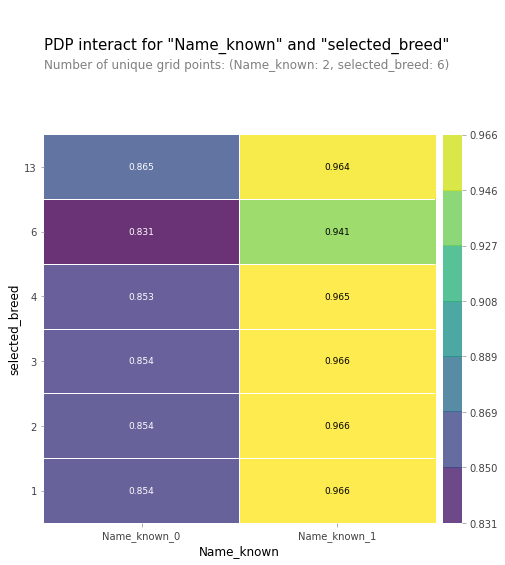

In [329]:
pdp_interact_plot(interaction,plot_type='grid',
                  feature_names=features)
plt.show()

In [330]:
import shap

In [331]:
row = X_test_transformed_t.iloc[[15]]
row 

,animal_type,color,sex_upon_outcome,Name_known,age_upon_outcome_d,sex,age_days_at_intake,selected_breed
4248,1,31.0,1,1,365.0,1,371,1


In [332]:
df.iloc[4248]

animal_type                         Cat
color                 Brown Tabby/White
sex_upon_outcome          spayed female
Target                                1
Name_known                            1
age_upon_outcome_d                  365
sex                              female
age_days_at_intake                  371
selected_breed                      Cat
Name: 4248, dtype: object

In [333]:
model.predict(row)

array([1])

In [334]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [335]:
row = X_test_transformed_t.iloc[[7]]
row 

,animal_type,color,sex_upon_outcome,Name_known,age_upon_outcome_d,sex,age_days_at_intake,selected_breed
76615,2,1.0,2,1,730.0,2,731,2


In [336]:
model.predict(row)

array([1])

In [337]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

Overall model


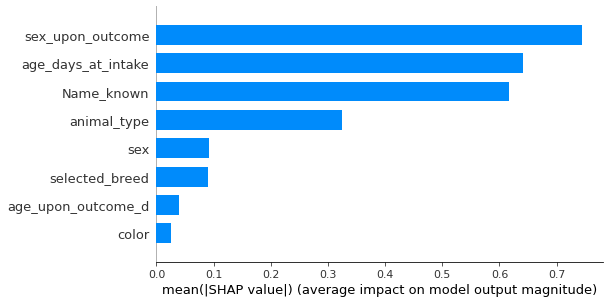

In [338]:
print("Overall model")
shap_values = shap.TreeExplainer(model).shap_values(X_train_transformed_t)
shap.summary_plot(shap_values, X_train_transformed_t, plot_type="bar")

Animal in row 76615


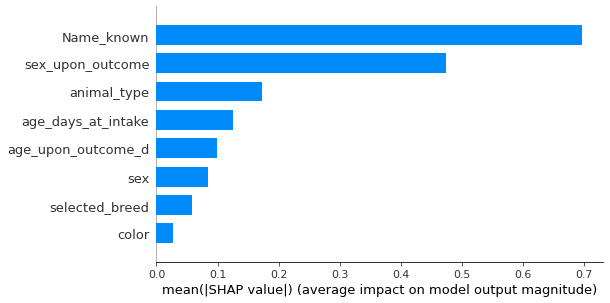

In [339]:
print('Animal in row 76615')
shap_values = shap.TreeExplainer(model).shap_values(row)
shap.summary_plot(shap_values, row, plot_type="bar")

In [340]:
df_shelter.iloc[76615]

age_upon_outcome                    15 years
animal_id                            A763174
animal_type                              Cat
breed                 American Shorthair Mix
color                           Calico/White
date_of_birth            2002-12-04T00:00:00
datetime                 2017-12-26T15:43:00
monthyear                2017-12-26T15:43:00
name                                   Kitty
outcome_subtype                          NaN
outcome_type                        Adoption
sex_upon_outcome               spayed female
Target                                     1
Name_known                                 1
age_upon_outcome_d                      5475
sex                                   female
age_days_at_intake                      5501
year_birth                              2002
month_birth                               12
year_intake                             2017
month_intake                              12
selected_breed                           Cat
Name: 7662

In [345]:
y_train_t.mean(), y_test_t.mean()

(0.909545490853902, 0.910217905297463)